# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS-109A Introduction to Data Science

## Lab 7: Building a Neural Network and Dealing with missing values

**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors:** Pavlos Protopapas and Kevin Rader<br/>
**Lab Instructor:** Eleni Kaxiras<br/>
**Authors:** David Sondak and Pavlos Protopapas

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
%matplotlib inline

## Learning Goals
In this lab, we'll revise matrix operations and talk about tensors. We will also talk about handling missing data.

By the end of this lab, you should:

- Be able to think of vectors and arrays as tensors.
- Understand how a simple neural network works and code its functions from scratch.
- Know how to use simple pandas and scikit-learn functions to handle missing values.

## Part 1. Tensors and Neural Networks

We can think of tensors as multidimensional arrays of numerical values; their job is to  generalize matrices to multiple dimensions. While tensors first emerged in the 20th century, they have since been applied to numerous other disciplines, including machine learning. Tensor decomposition/factorization can solve, among other, problems in unsupervised learning settings, temporal and multirelational data. When we get to handling images for Convolutional Neural Networks, it's a good idea to have the understanding of tensors of rank 3.

We will use the following naming conventions:

- scalar = just a number = rank 0 tensor  ($a$ ∈ $F$,)
<BR><BR>
- vector = 1D array = rank 1 tensor ( $x = (\;x_1,...,x_i\;)⊤$ ∈ $F^n$ )
<BR><BR>
- matrix = 2D array = rank 2 tensor ( $\textbf{X} = [a_{ij}] ∈ F^{m×n}$ )
<BR><BR>
- 3D array = rank 3 tensor ( $\mathscr{X} =[t_{i,j,k}]∈F^{m×n×l}$ )
<BR><BR>
- $\mathscr{N}$D array = rank $\mathscr{N}$ tensor ( $\mathscr{T} =[t_{i1},...,t_{i\mathscr{N}}]∈F^{n_1×...×n_\mathscr{N}}$ ) 
    

#### Python library for tensors
Machine learning libraries have special functions to handle tensors. Numpy has `numpy.tensordot`. Feel free to read about it: [numpy.tensordot](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.tensordot.html), but we will **not be covering it** in class.

#### Tensor indexing
We can create subarrays by fixing some of the given tensor’s indices. We can create a vector by fixing all but one index. A 2D matrix is created when fixing all but two indices. For example, for a third order tensor the vectors are $\mathscr{X}[:,j,k]$ = $\mathscr{X}[j,k]$ (column), $\mathscr{X}[i,:,k]$ = $\mathscr{X}[i,k]$ (row), and $\mathscr{X}[i,j,:]$ = $\mathscr{X}[i,j]$ (tube); the matrices are $\mathscr{X}[:,:,k]$ (frontal), $\mathscr{X}[:,j,:]$ (lateral), $\mathscr{X}[i,:,:]$ (horizontal). 
#### Tensor multiplication
We can multiply one matrix with another as long as the sizes are compatible ((n × m) × (m × p) = n × p), and also multiply an entire matrix by a constant. Numpy `numpy.dot` performs a matrix multiplication which is straightforward when we have 2D or 1D arrays. But what about > 3D arrays? The function will choose according to the matching dimentions but if we want to choose we should use `tensordot`, but, again, we do not need that for this class. 

In this lab we will be doing a lot of array manipulation, including: 
- reshaping arrays, 
- slicing x = x[0, 10:15, 10:15] brings it into a lower rank, reordering. Create some small tensors.  
- matrix multiplication.

### Reese Witherspoon as a rank 3 Tensor

(photo from [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/person/Reese_Witherspoon.html))

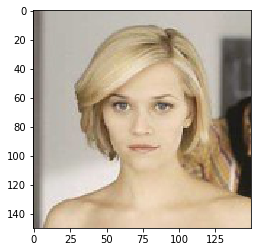

In [31]:
# load and show the image
img = mpimg.imread('Reese_Witherspoon.jpg')
imgplot = plt.imshow(img)

What type is this image? We have a suspicion that it's an array so let's find out its shape.

In [32]:
type(img), img.shape

(numpy.ndarray, (150, 150, 3))

It’s a 24-bit RGB PNG image (height, width, channels) with 8 bits for each of R, G, B. Explore and print the array.

In [33]:
img[:][0:1][:3]  # selects all rows, 2nd column, and all slices

array([[[ 36,  25,  21],
        [118, 107, 103],
        [116, 105, 101],
        [116, 107, 102],
        [127, 118, 113],
        [142, 133, 128],
        [152, 145, 139],
        [164, 157, 151],
        [176, 171, 165],
        [181, 176, 170],
        [183, 180, 173],
        [184, 181, 174],
        [183, 183, 175],
        [183, 183, 175],
        [183, 183, 175],
        [182, 182, 174],
        [186, 183, 176],
        [187, 184, 177],
        [187, 184, 177],
        [187, 184, 177],
        [187, 184, 177],
        [187, 184, 177],
        [187, 184, 177],
        [187, 184, 177],
        [187, 184, 177],
        [187, 184, 177],
        [187, 184, 177],
        [188, 185, 178],
        [189, 186, 179],
        [189, 186, 179],
        [189, 186, 179],
        [189, 186, 179],
        [189, 186, 179],
        [190, 187, 180],
        [191, 188, 181],
        [191, 188, 181],
        [191, 188, 181],
        [191, 188, 181],
        [191, 188, 181],
        [191, 188, 181],


In [34]:
img[130]

array([[ 34,  27,  21],
       [115, 108, 102],
       [115, 108, 100],
       [123, 116, 108],
       [146, 139, 131],
       [175, 168, 160],
       [197, 190, 182],
       [214, 207, 199],
       [231, 224, 218],
       [225, 218, 212],
       [229, 221, 218],
       [229, 221, 219],
       [225, 217, 215],
       [233, 227, 227],
       [237, 231, 231],
       [222, 216, 218],
       [240, 232, 229],
       [232, 224, 221],
       [223, 214, 209],
       [228, 219, 212],
       [240, 230, 220],
       [228, 216, 204],
       [199, 186, 170],
       [183, 167, 151],
       [176, 159, 139],
       [177, 156, 135],
       [170, 148, 125],
       [159, 135, 111],
       [151, 125, 102],
       [154, 126, 102],
       [163, 135, 111],
       [172, 142, 118],
       [179, 146, 111],
       [180, 147, 112],
       [184, 151, 116],
       [180, 147, 112],
       [179, 146, 111],
       [182, 149, 114],
       [180, 147, 112],
       [183, 150, 115],
       [188, 155, 120],
       [192, 159

In [35]:
img[130][100]

array([225, 199, 164], dtype=uint8)

In [36]:
# we are down to a single pixel
img[130][3][0]

123

In [37]:
type(img)

numpy.ndarray

#### Slicing tensors: slice along each axis

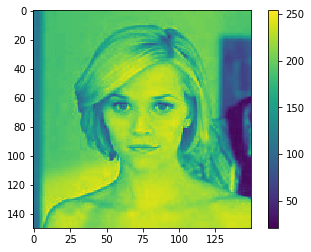

In [38]:
R_img = img[:,:,0]
G_img = img[:,:,1]
B_img = img[:,:,2]
plt.imshow(R_img)
plt.colorbar()

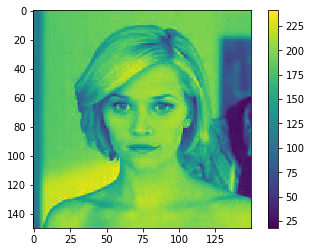

In [39]:
plt.imshow(G_img)
plt.colorbar()

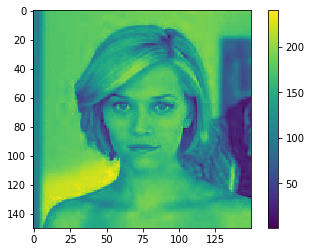

In [40]:
plt.imshow(B_img)
plt.colorbar()

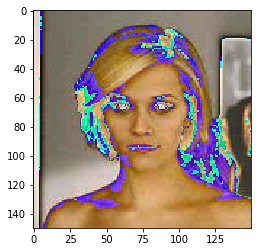

In [41]:
# practice matrix by scalar
img = img * 2
plt.imshow(img)

### Neural Networks 101: Starting with a Single Node

We begin with a single node (also called a neuron).

![perceptron](figs/perceptron.png)

There are some inputs $x$, which get combined into an auxilliary variable $z$.  The auxilliary variable is passed through the activation function $\sigma\left(z\right)$ and the result is the output.

Here is another image showing each step.

![](figs/expanded-perceptron.png)

Notice that the inputs are linearly combined according to some weights $w$ and a bias $b$.  This transformation is also sometimes called an **affine** transformation.  The perceptron transforms the weighted inputs according to the rule of the activation function.  For a single perceptron, the output $y$ is just the output from the perceptron.  The linear transformation and activation of the neuron occurs within a single **layer** of the network (shown in the dotted box).

### Example
The task is to approximate (or learn) a function $f\left(x\right)$ given some input $x$.  For demonstration purposes, the function we will try to learn is a Gaussian function 
\begin{align}
f\left(x\right) = e^{-x^{2}}
\textrm{}
\end{align}

Even though we represent the input $x$ as a vector on the computer, you should think of it as a single input.  For example, we're not passing $x$ and $y$ into the network.

In [42]:
x = np.linspace(-5.0, 5.0, 500) # input points
x[:5]

array([-5.        , -4.97995992, -4.95991984, -4.93987976, -4.91983968])

Let's plot the sigmoid and the tanh to see their difference

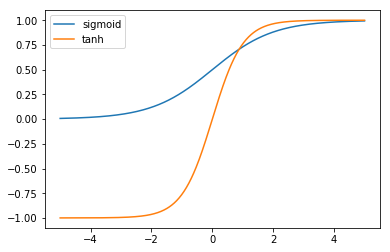

In [43]:
def sigmoid(x):                                        
    return 1 / (1 + np.exp(-x)) # The real function

plt.plot(x, sigmoid(x), label='sigmoid')
plt.plot(x, np.tanh(x), label='tanh')
plt.legend()

To transform a $tanh$ into a $sigmoid$:

\begin{align}
\dfrac{1}{2}+\dfrac{1}{2}\tanh(\dfrac{x-c}{a}) = \dfrac{1}{2}+\dfrac{1}{2}\dfrac{e^{(x-c)/a} - e^{- (x-c)/a}}{e^{(x-c)/a)} + e^{- (x-c)/a}}=\dfrac{1}{1+e^{-2(x-c)/a}} \qquad\text{(1.2)}
\textrm{}
\end{align}
<BR>
($c$ is the threshold, $c$=0 in our case, and $a$ is the sharpness)

Now let's create and plot the dataset for our function

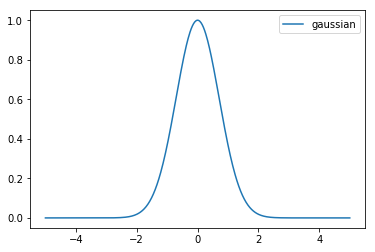

In [44]:
x = np.linspace(-5.0, 5.0, 500) # input points
f = np.exp(-x*x) # The real function

plt.plot(x, f, label='gaussian')
plt.legend()

Let's see what the single-layer, single neuron network give us.  We have a couple of choices to make:
1. We must choose some weights and some biases
2. We must choose an activation function

For now, we will manually specify the weights and biases.

We choose a *sigmoid* activation function $$\sigma\left(x\right) = \dfrac{1}{1 + e^{-z}}.$$  What are the limits $\displaystyle\lim_{z\to\infty}\sigma\left(z\right)$ and $\displaystyle\lim_{z\to-\infty}\sigma\left(z\right)$?  Actually, the sigmoid we have here is called the *logistic* function.  Sigmoids are really a family of functions and the logistic function is just one member in that family.

There are other activation functions as well.  For example:
* Rectified linear unit:  $$\sigma\left(z\right) = \text{max}\left(0, z\right)$$
* Hyperbolic tangent:  $$\sigma\left(z\right) = \tanh\left(z\right)$$

Choosing the correct activation function is a really big deal.  Notice that the activation functions we've mentioned so far have the feature that they "turn on" at some point and "saturate" at some point.

In [45]:
# Manually specify the weight and bias
w = -4.5 # weight
b = 3.0 # bias

# Perceptron output
z = w * x + b # Affine transformation
h = 1.0 / (1.0 + np.exp(-z)) # Sigmoid activation

And now we plot the activation function and the true function.

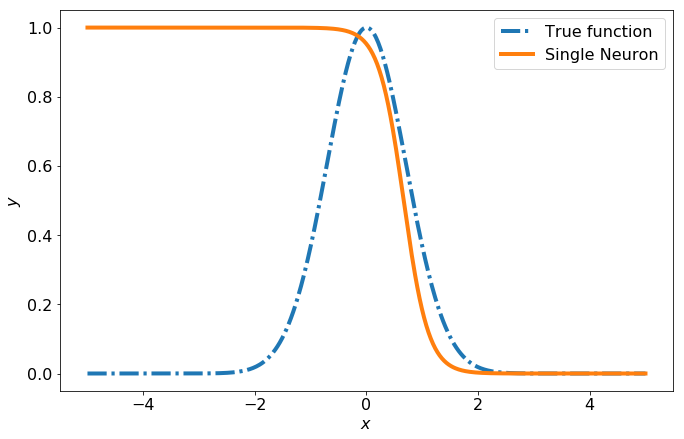

In [46]:
fig, ax = plt.subplots(1,1, figsize=(11,7)) # create axes object

SIZE = 16
# Plot
ax.plot(x, f, ls='-.', lw=4, label=r'True function')
ax.plot(x, h, lw=4, label=r'Single Neuron')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc=1) # Create a legend and make it big enough to read

The single perceptron simply turns the output on and off at some point, but that's about it.  We see that the neuron is on until about $x=0$ at which point it abruptly turns off.  It's able to get "close" to the true function.  Otherwise, it has nothing in common with the true function.

What do you think will happen if you change $w$ and $b$?

#### Exercise 1: Write two `Python` functions:

The first function should return an affine transformation of the data for a single neuron.  Here's the required interface:

In [47]:
# your code here
def affine(x, w, b):
    """Return affine transformation of x
    
    INPUTS
    ======
    x: A numpy array of points in x
    w: A float representing the weight of the perceptron
    b: A float representing the bias of the perceptron
    
    RETURN
    ======
    z: A numpy array of points after the affine transformation
       z = wx + b
    """
    
    # Code goes here
    return z

The second function should return the sigmoid activation function.  Here's the required interface:

In [48]:
# your code here
def sigmoid(z):
    # Code goes here
    return h

#### Exercise 2:  Using your two functions, recreate the example from class and try to change the weight and bias to get a better fit

##### Comments
* We say that the activation occurs when $\sigma = \dfrac{1}{2}$.  We can show that this corresponds to $x = -\dfrac{b}{w}$.
* The "steepness" of the sigmoid is controlled by $w$.

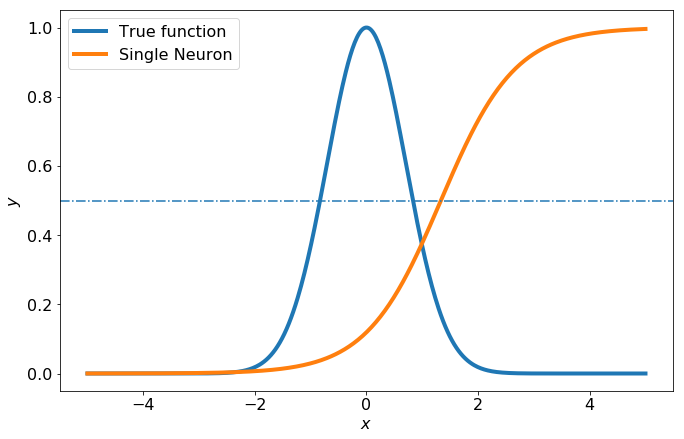

In [49]:
# your code here
def affine(x, w, b):
    return w * x + b

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

x = np.linspace(-5.0, 5.0, 500) # input points
f = np.exp(-x*x) # data

w = 1.5
b = -2.0

h = sigmoid(affine(x, w, b))

# Plot
fig, ax = plt.subplots(1,1, figsize=(11,7))
ax.plot(x, f, lw=4, label=r'True function')
ax.plot(x, h, lw=4, label=r'Single Neuron')
ax.axhline(y=0.5, linestyle='-.')
# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc=2) # Create a legend and make it big enough to read

#### Important Observation
Notice that we wrote the output as `sigmoid(affine(x))`.  This was not a coincidence.  It looks like a composition of functions.  In fact, that is what a neural network is doing.  It's building up an approximation to a function by creating a composition of functions.  For example, a composition of three functions would be written as $$\varphi_{3}\left(\varphi_{2}\left(\varphi_{1}\left(x\right)\right)\right).$$

What happens if we play with the weights and biases?

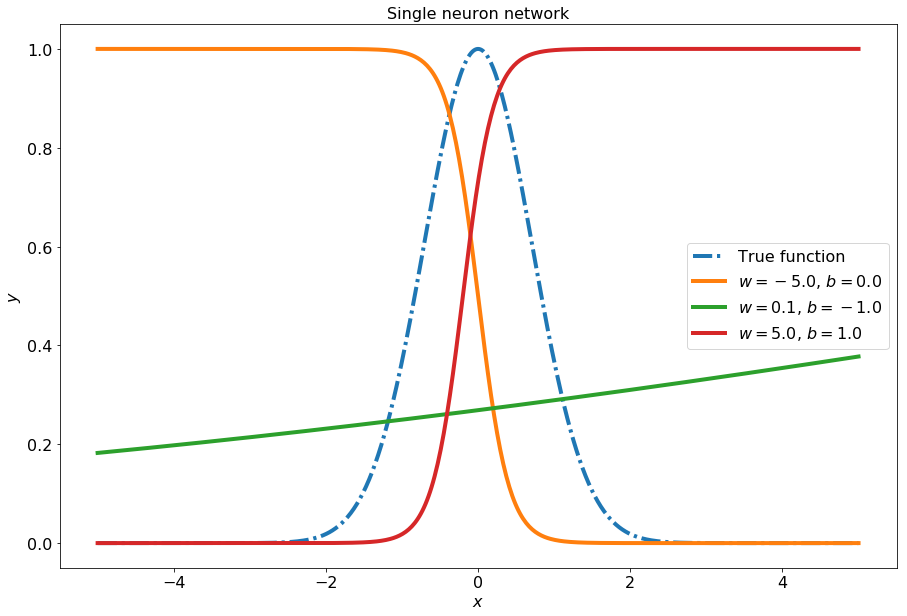

In [51]:
w = [-5.0, 0.1, 5.0] # Create a list of weights
b = [0.0, -1.0, 1.0] # Create a list of biases

fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot(x, f, lw=4, ls='-.', label='True function')
for wi, bi in zip(w, b):
    h = sigmoid(affine(x, wi, bi))
    ax.plot(x, h, lw=4, label=r'$w = {0}$, $b = {1}$'.format(wi,bi))
ax.set_title('Single neuron network', fontsize=SIZE)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

We didn't do an exhaustive search of the weights and biases, but it sure looks like this single perceptron is never going to match the actual function.  Again, we shouldn't be suprised about this.  The output layer of the network is simple the logistic function, which can only have so much flexibility.

Let's try to make our network more flexible by using **more nodes**!

## Multiple Perceptrons in a Single Layer
It appears that a single neuron is somewhat limited in what it can accomplish.  What if we expand the number of nodes/neurons in our network?  We have two obvious choices here.  One option is to add depth to the network by putting layers next to each other.  The other option is to stack neurons on top of each other in the same layer.  Now the network has some width, but is still only one layer deep.

The following figure shows a single-layer network with two nodes in one layer.

![](figs/multiple-perceptrons.png)

#### Some observations
1. We still have a single input in this case.  Note that this is not necessary in general.  We're just keeping things simple with a single input for now. If we have more inputs we will have a matrix for $X$.
2. Each node (or neuron) has a weight and bias associated with it.  An affine transformation is performed for each node.
3. Both nodes use the same activation function form $\sigma\left(\cdot\right)$ on their respective inputs.
4. The outputs of the nodes must be combined to give the overall output of the network.  There are a variety of ways of accomplishing this.  In the current example, we just take a linear combination of the node outputs to produce the actual prediction.  Notice that now we have weights and biases at the output too.

Let's see what happens in this case.  First, we just compute the outputs of each neuron.

In [61]:
x = np.linspace(-5.0, 5.0, 500) # input points
f = np.exp(-x*x) # data

w = np.array([1.5, -2.5])
b = np.array([0.4, -2.0])

# Affine transformations
z1 = w[0] * x + b[0]
z2 = w[1] * x + b[1]

# Node outputs
h1 = 1.0 / (1.0 + np.exp(-z1))
h2 = 1.0 / (1.0 + np.exp(-z2))

Now let's plot things and see what they look like.

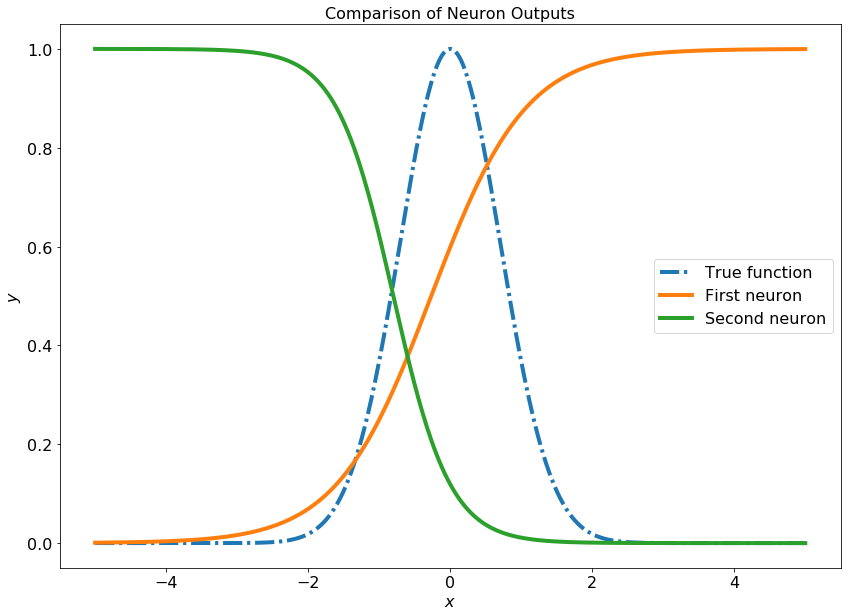

In [62]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f, lw=4, ls = '-.', label='True function')
ax.plot(x, h1, lw=4, label='First neuron')
ax.plot(x, h2, lw=4, label='Second neuron')

# Set title
ax.set_title('Comparison of Neuron Outputs', fontsize=SIZE)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

Just as we expected.  Some sigmoids.  Of course, to get the network prediction we must combine these two sigmoid curves somehow.  First we'll just add $h_{1}$ and $h_{2}$ without any weights to see what happens.

#### Note
We are **not** doing classification here.  We are trying to predict an actual function.  The sigmoid activation is convenient when doing classification because you need to go from $0$ to $1$.  However, when learning a function, we don't have as good of a reason to choose a sigmoid.

In [63]:
# Network output
wout = np.ones(2) # Set the output weights to unity to begin
bout = 0.0 # No bias yet
yout = wout[0] * h1 + wout[1] * h2 + bout

And plot.

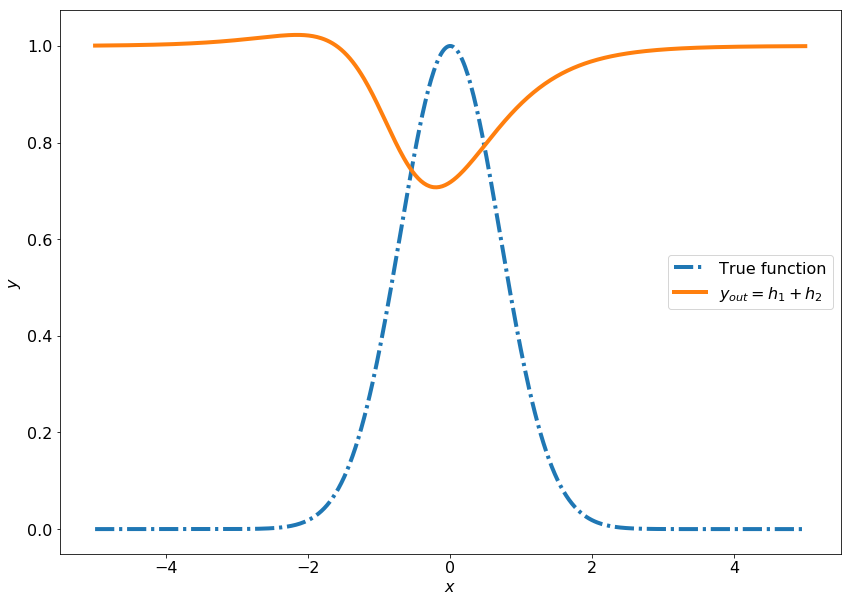

In [64]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f, ls='-.', lw=4, label=r'True function')
ax.plot(x, yout, lw=4, label=r'$y_{out} = h_{1} + h_{2}$')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

#### Observations
* The network prediction is still not good. *But*, it is pretty sophisticated.  We just have two neurons, but we get some pretty interesting behavior. We didn't do anything with the output weights.  Those are probably important.  Now let's see what happens when we change the weights on the output.

In [65]:
# Network output
wout = np.array([-1.5, -1.5])
bout = np.array(1.5)

yout = wout[0] * h1 + wout[1] * h2 + bout

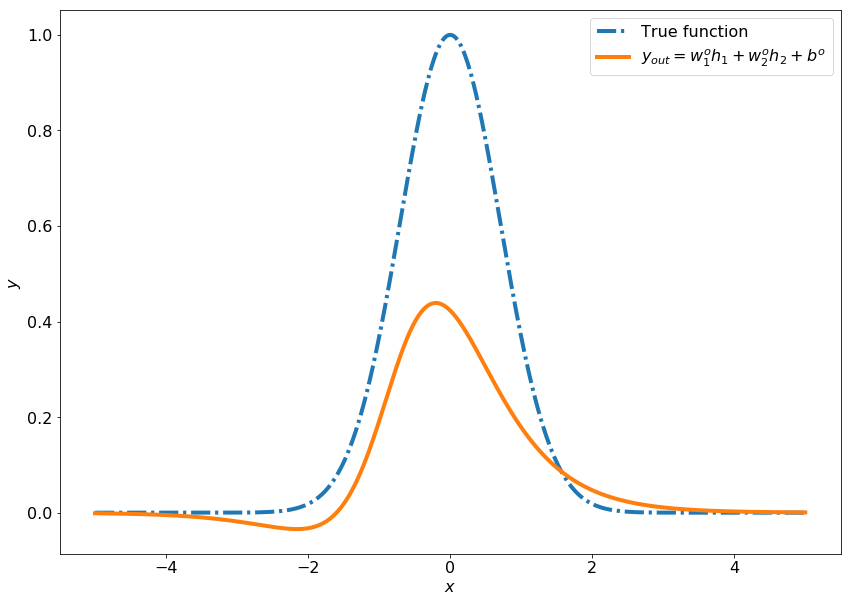

In [66]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f, lw=4, ls = '-.', label='True function')
ax.plot(x, yout, lw=4, label=r'$y_{out} = w_{1}^{o}h_{1} + w_{2}^{o}h_{2} + b^{o}$')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc=1) # Create a legend and make it big enough to read

Very cool!  The two nodes interact with each other to produce a pretty complicated-looking function.  It still doesn't match the true function, but now we have some hope.  In fact, it's starting to look a little bit like a Gaussian!

We can do better.  There are three obvious options at this point:
1. Change the number of nodes
2. Change the activation functions
3. Change the weights

### Some Mathematical Notation
Before proceeding, let's learn a more succint way of doing the calculations.  If you have a network with a lot of nodes, then you probably don't want to manually determine the output of each node.  It will take forever.  Instead, you can package the computations up using a more compact notation.  We'll illustrate the ideas with the two-node network.

Suppose we have a single input $x$ to a single-layer two-node network.  We can store the weights from each node in a vector $\mathbf{w} \in \mathbb{R}^{2}$.  Similarly, we can store the biases from each node in a vector $\mathbf{b} \in \mathbb{R}^{2}$.  The affine transformation is then written as $$\mathbf{z} = \mathbf{w}x + \mathbf{b}$$ where the usual laws of vector addition and multiplication by a scalar apply.  Of course, we have that $\mathbf{z} \in \mathbb{R}^{2}$ as well.  Next we evaluate the output from each node.  Formally, we write $$\mathbf{h} = \sigma\left(\mathbf{z}\right)$$ where, once again, $\mathbf{h}\in\mathbb{R}^{2}$.  Moreover, it is *understood* that $\sigma$ operates on each individual element of $\mathbf{z}$ separately.  If we denote each component of $\mathbf{z}$ by $z_{j}, \quad j = 1, 2$ then we can write $$h_{j} = \sigma\left(z_{j}\right), \quad j = 1, 2.$$

Lastly, we must do something about the output layer.  Mathematically we write $$y_{out} = \mathbf{w}_{out} \cdot \mathbf{h} + b_{out}$$ where $\mathbf{w}_{out} \in \mathbb{R}^{2}$ and $b_{out} \in \mathbb{R}$.

### Comments on the Implementation
Mathematically, this all makes perfect sense.  There is a slight wrinkle when we get to the implementation.  The reason is that $x$ must be stored as a vector (or array) on the computer!  When we do that, we must be very careful in telling the computer how to perform the multiplications.

#### Example A
Suppose we have just stored three points in $x$ on the computer and store $x$ in an array.  Then we have 
\begin{align}
  x = \begin{bmatrix} x_{1} \ x_{2} \ x_{3} \end{bmatrix}.
\end{align}
When we write $\mathbf{w}x + \mathbf{b}$ the computer actually doesn't know what multiplication we want to do.  If we treat $x$ as though it has dimension $3 \times 1$ then simply multiplying $\mathbf{w}$ by $x$ will result in a dimension mismatch error.

#### Example B
What if we're at the output of the network?  Then $\mathbf{h}$ is stored as a $2 \times \text{num_points}$ array.  But $\mathbf{w}_{out}$ is a $2\times 1$ array!  To get the dot product right, we need to tell the computer to take the dot product on each column.  Here's the situation:
\begin{align}
  \mathbf{w}_{out} \cdot \mathbf{h} &= 
  \begin{bmatrix}
    w_{1}^{out} \ \ w_{2}^{out}
  \end{bmatrix}^{T}
  \begin{bmatrix}
    h_{11} & h_{12} & h_{13} \\
    h_{21} & h_{22} & h_{23}
  \end{bmatrix}
  \\
  &=
  \begin{bmatrix}
    w_{1}^{out}h_{11} + w_{2}^{out}h_{21} \qquad w_{1}^{out}h_{12} + w_{2}^{out}h_{22} \qquad w_{1}^{out}h_{13} + w_{2}^{out}h_{23}
  \end{bmatrix}
\end{align}

## Part 2. Handling Missing Variables

#### Imputation in pandas

Pandas has chosen to use the floating point NaN internally to denote missing data and that was largely for simplicity and performance reasons. The library will also recognize the Python `None` as “missing” or “not available” or “NA”. When doing descriptive statistics, pandas excludes missing values by default. 

In [90]:
s = pd.Series([0, 1, np.nan, 4, 6, 8, 15, 23, 25, np.nan])
s

0     0.0
1     1.0
2     NaN
3     4.0
4     6.0
5     8.0
6    15.0
7    23.0
8    25.0
9     NaN
dtype: float64

In [91]:
# look for missing values
s.isna() # or s.isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6    False
7    False
8    False
9     True
dtype: bool

pandas can [interpolate](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate) according to different methods.

In [92]:
# how many?
s.isna().sum()

2

In [93]:
s.isnull().sum()

2

In [95]:
# fill with zeros
s.fillna(0)
# s['one'].fillna('missing')

0     0.0
1     1.0
2     0.0
3     4.0
4     6.0
5     8.0
6    15.0
7    23.0
8    25.0
9     0.0
dtype: float64

In [97]:
# You may wish to simply exclude labels from a data set which refer to missing data. To do this, use 
s = pd.Series([0, 1, np.nan, 4, 6, 8, 15, 23, 25, np.nan])
s = s.dropna()
s

0     0.0
1     1.0
3     4.0
4     6.0
5     8.0
6    15.0
7    23.0
8    25.0
dtype: float64

In [98]:
s = pd.Series([0, 1, np.nan, 4, 6, 8, 15, 23, 25, np.nan])
s.interpolate()

0     0.0
1     1.0
2     2.5
3     4.0
4     6.0
5     8.0
6    15.0
7    23.0
8    25.0
9    25.0
dtype: float64

#### Imputation in scikit-learn

In [20]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(copy=True, missing_values=np.nan, strategy='mean')
s1 = pd.Series([0, 1, np.nan, 4, 6, 8, 15, 23, 25, np.nan])
s2 = pd.Series([0, 1, np.nan, 4, 6, 8, 15, 23, 25, np.nan])
d = {'col1': s1, 'col2': s2}
df = pd.DataFrame(data=d)
df

,col1,col2
0,0.0,0.0
1,1.0,1.0
2,NaN,NaN
3,4.0,4.0
4,6.0,6.0
5,8.0,8.0
6,15.0,15.0
7,23.0,23.0
8,25.0,25.0
9,NaN,NaN


In [24]:
imp.fit(df) 
df = imp.transform(df)
df

array([[ 0.  ,  0.  ],
       [ 1.  ,  1.  ],
       [10.25, 10.25],
       [ 4.  ,  4.  ],
       [ 6.  ,  6.  ],
       [ 8.  ,  8.  ],
       [15.  , 15.  ],
       [23.  , 23.  ],
       [25.  , 25.  ],
       [10.25, 10.25]])

In [19]:
SimpleImputer(copy=True, fill_value=None, missing_values=np.nan, strategy='mean', verbose=0)
print(imp.transform(df))           

[[ 0.    0.  ]
 [ 1.    1.  ]
 [10.25 10.25]
 [ 4.    4.  ]
 [ 6.    6.  ]
 [ 8.    8.  ]
 [15.   15.  ]
 [23.   23.  ]
 [25.   25.  ]
 [10.25 10.25]]


In [27]:
imp2 = SimpleImputer(strategy="most_frequent")
s1 = pd.Series(['eleni', 'john', np.nan, 'john', 'mary', 'john', 'george', 'eleni', 'john', np.nan])
d = {'name': s1}
df = pd.DataFrame(data=d)
df

,name
0,eleni
1,john
2,NaN
3,john
4,mary
5,john
6,george
7,eleni
8,john
9,NaN


In [28]:
imp2.fit(df) 
df = imp2.transform(df)
df

array([['eleni'],
       ['john'],
       ['john'],
       ['john'],
       ['mary'],
       ['john'],
       ['george'],
       ['eleni'],
       ['john'],
       ['john']], dtype=object)